## Summary

In [6]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,285,1327411511002710017,Combining 2 days (3D&amp;Raster) for #30DayMap...,en,2020-11-14 00:42:20,1,18,"[{'text': '30DayMapChallenge', 'indices': [37,...",3007214442,AliceCarol,pnwgeogeek,"Portland, OR",140,361,http://pbs.twimg.com/media/EmvpLKQVgAE272a.jpg,https://t.co/Wby6Fy3Cmg
4325,286,1327409302248755200,Día 10 grid/malla #30DayMapChallenge en colabo...,es,2020-11-14 00:33:34,1,3,"[{'text': '30DayMapChallenge', 'indices': [18,...",1244146648009203714,Lucía Navarro Loperena,LuciaNavrro,NaN,101,209,http://pbs.twimg.com/media/EmvntotXIAEkNjc.jpg,https://t.co/bxC5vJEULM
4326,287,1327409016662847489,Vienna can be divided in two halfs: below and ...,en,2020-11-14 00:32:26,1,8,"[{'text': '30DayMapChallenge', 'indices': [72,...",281177027,Isaak,fleischkas,Wien,142,981,http://pbs.twimg.com/media/EmvnYv3W4AElBa8.jpg,https://t.co/MCiK0sruG3
4327,288,1327405129553895426,"For #30DayMapChallenge day 13 – raster, I revi...",en,2020-11-14 00:16:59,1,2,"[{'text': '30DayMapChallenge', 'indices': [4, ...",14707170,Unnecessarily sesquipedalian 🚡,MartinBangratz,Cologne/Aachen/Innsbruck,1162,1169,http://pbs.twimg.com/media/EmvTb9YW4AAT7l8.jpg,https://t.co/t51OkXOQg9


In [8]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [9]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,285,1327411511002710017,Combining 2 days (3D&amp;Raster) for #30DayMap...,en,2020-11-14 00:42:20,1,18,"[{'text': '30DayMapChallenge', 'indices': [37,...",3007214442,AliceCarol,pnwgeogeek,"Portland, OR",140,361,http://pbs.twimg.com/media/EmvpLKQVgAE272a.jpg,https://t.co/Wby6Fy3Cmg,2020-11-14
4325,286,1327409302248755200,Día 10 grid/malla #30DayMapChallenge en colabo...,es,2020-11-14 00:33:34,1,3,"[{'text': '30DayMapChallenge', 'indices': [18,...",1244146648009203714,Lucía Navarro Loperena,LuciaNavrro,NaN,101,209,http://pbs.twimg.com/media/EmvntotXIAEkNjc.jpg,https://t.co/bxC5vJEULM,2020-11-14
4326,287,1327409016662847489,Vienna can be divided in two halfs: below and ...,en,2020-11-14 00:32:26,1,8,"[{'text': '30DayMapChallenge', 'indices': [72,...",281177027,Isaak,fleischkas,Wien,142,981,http://pbs.twimg.com/media/EmvnYv3W4AElBa8.jpg,https://t.co/MCiK0sruG3,2020-11-14
4327,288,1327405129553895426,"For #30DayMapChallenge day 13 – raster, I revi...",en,2020-11-14 00:16:59,1,2,"[{'text': '30DayMapChallenge', 'indices': [4, ...",14707170,Unnecessarily sesquipedalian 🚡,MartinBangratz,Cologne/Aachen/Innsbruck,1162,1169,http://pbs.twimg.com/media/EmvTb9YW4AAT7l8.jpg,https://t.co/t51OkXOQg9,2020-11-14


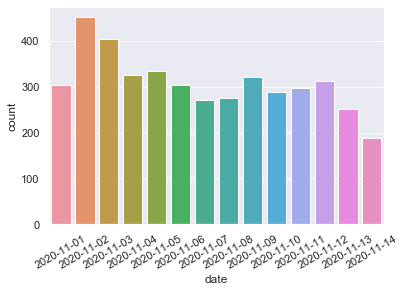

In [10]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)
plt.xticks(rotation=30)

plt.savefig("./graphs/maps_count.png", bbox_inches = 'tight')